In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #01 - Function Fitting

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using function fitting.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Talia Kurtz"
__contact__   = "talia.kurtz@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
import os
import csv
import pandas as pd

In [3]:
### Read in observations ###
file = open('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/01-Function_Fitting/RAOBs_201903131200.txt')
csvreader = csv.reader(file)
###########################################################################################################################
rows = []
for row in csvreader:
        rows.append(row)
rows #Reading in the data this way because there are no headers and there are /n 

[['CWPL', '51.47', '-90.20', '5460.0', '285.0', '29.0'],
 ['CWQI', '43.83', '-66.00', '5540.0', '325.0', '41.0'],
 ['CWSE', '53.55', '-113.90', '5360.0', '280.0', '12.0'],
 ['CYAH', '53.75', '-73.60', '5340.0', '300.0', '70.0'],
 ['CYBK', '64.30', '-96.00', '5220.0', '95.0', '17.0'],
 ['CYCB', '69.10', '-105.10', '5190.0', '245.0', '32.0'],
 ['CYEU', '80.00', '-85.80', '4890.0', '200.0', '40.0'],
 ['CYEV', '68.30', '-133.40', '5210.0', '245.0', '37.0'],
 ['CYFB', '63.75', '-68.50', '5140.0', '290.0', '17.0'],
 ['CYJT', '48.53', '-58.50', '5360.0', '280.0', '45.0'],
 ['CYLT', '82.52', '-62.20', '4970.0', '255.0', '21.0'],
 ['CYMO', '51.27', '-80.60', '5450.0', '275.0', '37.0'],
 ['CYPH', '58.47', '-78.00', '5180.0', '285.0', '25.0'],
 ['CYQD', '53.97', '-101.10', '5370.0', '250.0', '31.0'],
 ['CYRB', '74.72', '-94.90', '5020.0', '250.0', '72.0'],
 ['CYSA', '43.93', '-60.00', '5490.0', '300.0', '21.0'],
 ['CYSM', '60.02', '-111.90', '5230.0', '300.0', '32.0'],
 ['CYUX', '68.78', '-81.20'

In [4]:
list_name = rows
df = pd.DataFrame (list_name, columns= ['Station ID', 'Lat', 'Lon', '500 mb Height', '500mb Wind Dir', '500mb Wind Speed'])
obs_lon = df['Lon'].astype(float)   #Getting the values to be floats.
obs_lat = df['Lat'].astype(float) #Getting the values to be floats.
obs_lon_rads = obs_lon*(np.pi/180)   #Getting from degrees to radians 
obs_lat_rads = obs_lat*(np.pi/180)  #Getting from degrees to radians
height = df['500 mb Height'].astype(float)  #Getting the values to be floats.
height = np.array(height)  #Pandas made it a series so we need to get it back into an array

In [5]:
### Set up analysis map with a 22x28 rectangular grid of points ###
x = 18.9 #x_o (NW corner of map i.e. the (0,0) array memember)
y = -6.3 #y_o (NW corner of map i.e. the (0,0) array memember)
delta_x = 1.27
delta_y = 1.27 #spacing of our points 
######################################################################
#Making the points on the map. Analysis points 
x_step = x + np.arange(22)*delta_x
y_step = y + np.arange(28)*delta_y

grid_x, grid_y = np.meshgrid(x_step,y_step)

In [7]:
### convert obs lat/long to x,y (may want to plot on your analysis grid to verify)###
#Longitude (from grid to longitude)
map_proj = 1/(15e6)
rho = 6371 * 1e5 #radius of Earth
lambda_o = -115
phi_o = 60*(np.pi/180)   #Converting to radians

#We are converting it from cm to longitude and latitude so that we can plot it 
##############################################################################
#converting the longitude from x-values to longitude  
proj_lon = np.arctan(grid_y/grid_x)*(180/np.pi) + lambda_o    #The projection in python has to be in latitude and longitude so these two steps are to go to lat/lon for the projection
#Converting the y-values to latitude values
proj_lat = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt((grid_x/map_proj)**2+(grid_y/map_proj)**2)/(rho*(1+np.sin(phi_o)))))) 
  

In [8]:
#convert the latitude and longitude form the text file and put them in the (x,y) form
#Trying to find sigma (image scale factor)
# sigma = (1 +sine (phi_o))/(1+sine(phi)) where phi is the latitude
phi_o = 60*(np.pi/180)


sigma_obs = (1 + np.sin(phi_o))/(1+np.sin(obs_lat_rads)) #this is our image scale factor
#print(sigma_obs)

#Determine the radius of any latitude circle 
lat_circle_radius = rho * sigma_obs*(np.cos(obs_lat_rads)) #this is the little r 
#print(lat_circle_radius)

#Solve for lambda which is the deviation of longitude from the standard longitude ( longitude of a point - lambda_o)
lambda_obs = ((obs_lon_rads)-(lambda_o*(np.pi/180)))
#print(lambda_obs)

#Now we are solving the observations for x 
x_obs = rho*sigma_obs*(np.cos(obs_lat_rads))*(np.cos(lambda_obs)) *map_proj 
#Now we are solving the observations for y 
y_obs = rho*sigma_obs*(np.cos(obs_lat_rads))*(np.sin(lambda_obs))* map_proj

x_obs = np.array(x_obs)
y_obs = np.array(y_obs)

#print(x_obs)
#print(y_obs)

obs_lon = np.arctan(y_obs/x_obs)*(180/np.pi) + lambda_o
print(obs_lon)
#Converting the y-values to latitude values
obs_lat = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt((x_obs/map_proj)**2+(y_obs/map_proj)**2)/(rho*(1+np.sin(phi_o)))))) 
#x,y coords for our observations 
print(obs_lat)

[ -90.2   -66.   -113.9   -73.6   -96.   -105.1   -85.8  -133.4   -68.5
  -58.5   -62.2   -80.6   -78.   -101.1   -94.9   -60.   -111.9   -81.2
  -68.4  -126.8  -122.5   -94.    -60.4  -127.3   -66.2  -122.8  -106.6
  -98.4  -152.4   -79.9  -156.6  -103.2   -72.2  -101.7  -150.   -131.5
  -82.4   -93.6  -161.8  -100.7   -85.2   -86.6  -116.2   -97.4  -156.7
  -78.7   -89.9   -68.   -162.7   -69.96  -80.    -97.5   -99.9  -104.7
 -100.7  -110.8  -104.8  -100.9   -83.4   -90.5  -106.7   -81.7  -147.8
  -84.5  -111.8   -95.6   -96.7  -106.6  -108.5   -88.1   -79.9   -70.26
  -77.4   -83.8   -88.6   -93.3  -155.    -90.    -81.7   -66.    -61.3
 -100.6   -93.2   -92.2  -114.2   -92.2  -102.2   -99.    -79.6  -122.8
  -76.88  -80.2   -93.55 -106.4   -97.2   -81.6  -117.1   -81.6  -118.59
 -122.2   -95.6   -97.6   -72.86 -165.4  -116.4  -162.6   -97.4   -89.6
  -80.2  -103.   -118.2  -108.4   -75.4   -79.5   -84.2   -69.8   -93.3
  -93.8   -89.7  -111.9  -123.   -170.22  -82.4  -110.6   -84.

In [10]:
### Perform 500mb geopotential height analyses using a second order 2-d polynomial with two ###
### radii of influence (10cm & 20cm) ###
Ro_vals = np.array([10,20,6])

y_cols = 22
x_cols = 28
#Make two empty arrays one for the observations and one for the Analysis 
obs_matrix = np.empty((x_cols, y_cols, len(Ro_vals)))
analysis_matrix = np.empty((x_cols, y_cols, len(Ro_vals)))

#Loop through the length of the radius of influence 
for i in range(len(Ro_vals)):
    roi = Ro_vals[i]
    for j in range(len(grid_x)):
        for k in range(len(grid_x[0])):
            x_rel = grid_x[j,k] - x_obs   #This is the distance in the x 
            y_rel = grid_y[j,k] - y_obs   #This is the distance in the y. 
            #This will the distance formula so we are getting the radius here remember the bubble with the points.
            radius = ((x_rel**2 + y_rel**2)**(1/2)) 
            index_ROI = np.where(radius <= roi)[0]
           
            #Make the observation matrix the same size as the index matrix 
            obs_matrix[j,k,i] = len(index_ROI) #start filling the matrix
            
            #using the equation fo(x_k, y_k) we need to make the matrices for each one of those variables
            x_k = x_rel[index_ROI]   #x_k  values are only within the ROI for each point
            y_k = y_rel[index_ROI]  #y_k  values are only within the ROI for each point
            Fo = height[index_ROI] #Fo  height values are only within the ROI for each point
            Fo = np.array(Fo)
            
            #More empty arrays
            R = np.zeros((6,6))
            O = np.zeros(6)
            #print(index_ROI)
            for q in range(len(y_k)):
                r2 = np.matrix([1,x_k[q],y_k[q],x_k[q]**2,y_k[q]**2,x_k[q]*y_k[q]])
                r1 = r2.T
                r = r1*r2
                R += np.array(r)
                O += np.array([Fo[q],x_k[q]*Fo[q], y_k[q]*Fo[q],x_k[q]**2*Fo[q],y_k[q]**2*Fo[q], x_k[q]*y_k[q]*Fo[q]])
            
            R = R/obs_matrix[j,k,i]
            #print(R)
            O = O/obs_matrix[j,k,i]
            # Calulate the C
            C = np.linalg.inv(np.matrix(R))*np.matrix(O).T
            #print(C[0,0])
            analysis_matrix[j,k,i] = C[0,0]  #Set equal to C_00 due to that being only value we care about


In [74]:
#Saving the matrices as text files.
#np.savetxt("Analysis_Matrix_ROI_10.txt", analysis_matrix[:,:,0], delimiter = ',')
#np.savetxt("Analysis_Matrix_ROI_20.txt", analysis_matrix[:,:,1], delimiter = ',')
#np.savetxt("Observation_Matrix_ROI_10.txt", obs_matrix[:,:,0], delimiter = ',')
#np.savetxt("Observation_Matrix_ROI_20.txt", obs_matrix[:,:,1], delimiter = ',')

In [ ]:
### Plot 500mb analyses over a map ###
#convert analysis x,y to lat/lon#
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)
#bue dots are the grid points we created
#orange dot is where there is an upper air observation
#ax1.scatter(proj_lon.ravel(), proj_lat.ravel(),transform = ccrs.PlateCarree())
#ax1.scatter(obs_lon, obs_lat, transform = ccrs.PlateCarree())
  
#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(proj_lon,proj_lat,analysis_matrix[:,:,],colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.title("500 mb Geopotential Height Chart ROI = 6cm")
#plt.savefig('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/01-Function_Fitting/20cm_radius_500mbheights_plot.png')
plt.show()


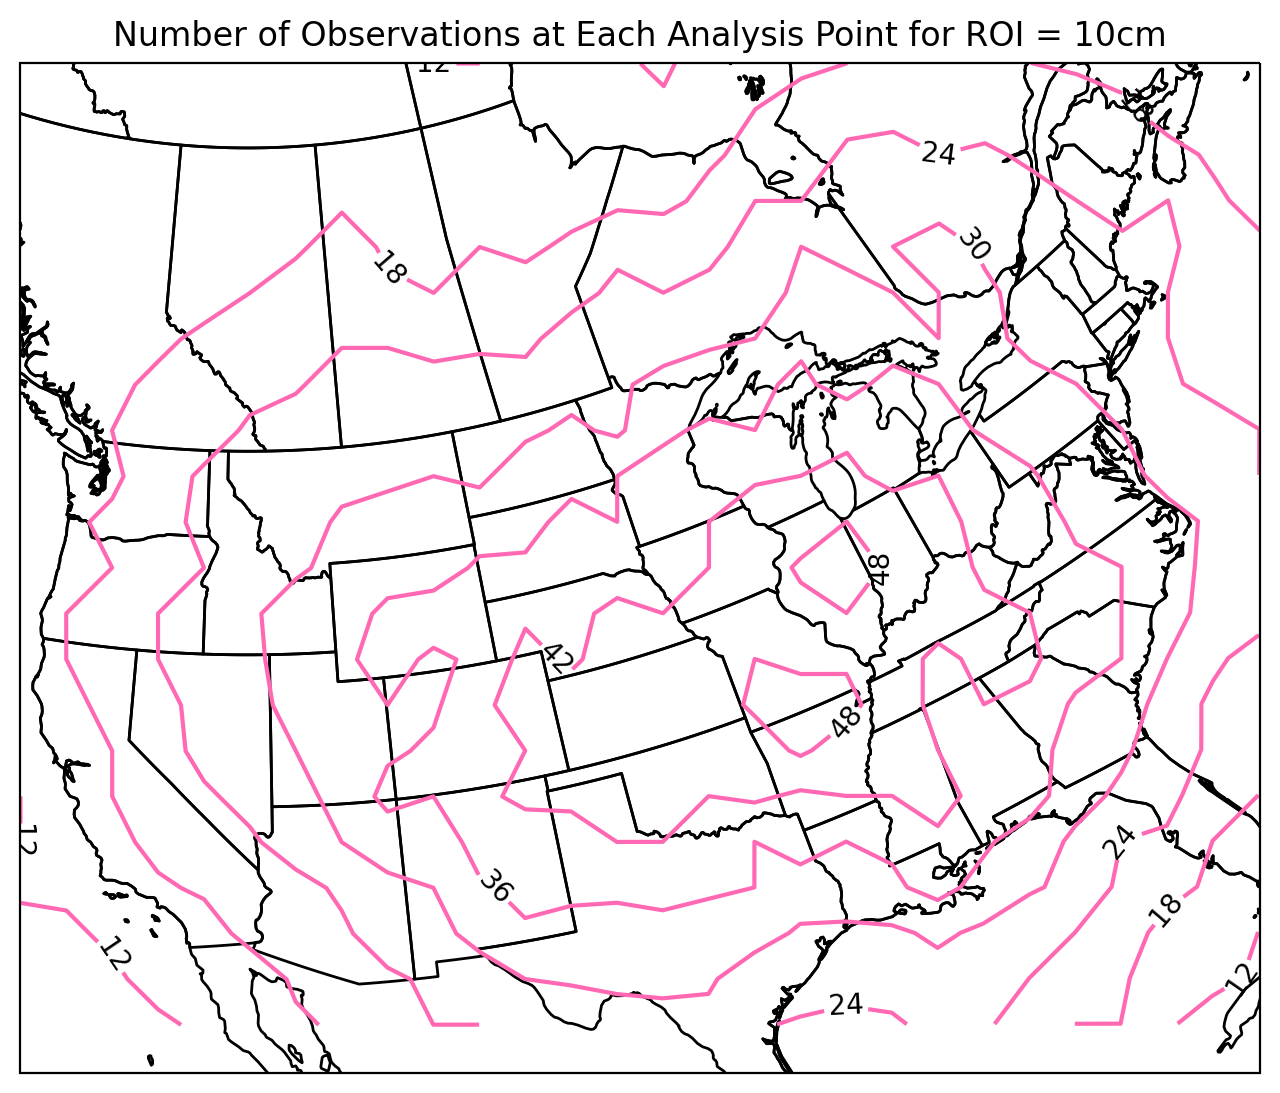

In [67]:
### Store the number of observations available for each grid point in text files ###
### Plot 500mb analyses over a map ###
#convert analysis x,y to lat/lon#
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)
#bue dots are the grid points we created
#orange dot is where there is an upper air observation
#ax1.scatter(proj_lon.ravel(), proj_lat.ravel(),transform = ccrs.PlateCarree())
#ax1.scatter(obs_lon, obs_lat, transform = ccrs.PlateCarree())
  
#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(proj_lon,proj_lat,obs_matrix[:,:,0],colors='hotpink',transform=ccrs.PlateCarree())
plt.clabel(cs1, colors = 'black')
plt.title("Number of Observations at Each Analysis Point for ROI = 10cm")
plt.savefig('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/01-Function_Fitting/number_obs_at_analysis_ROI10.png')
plt.show()



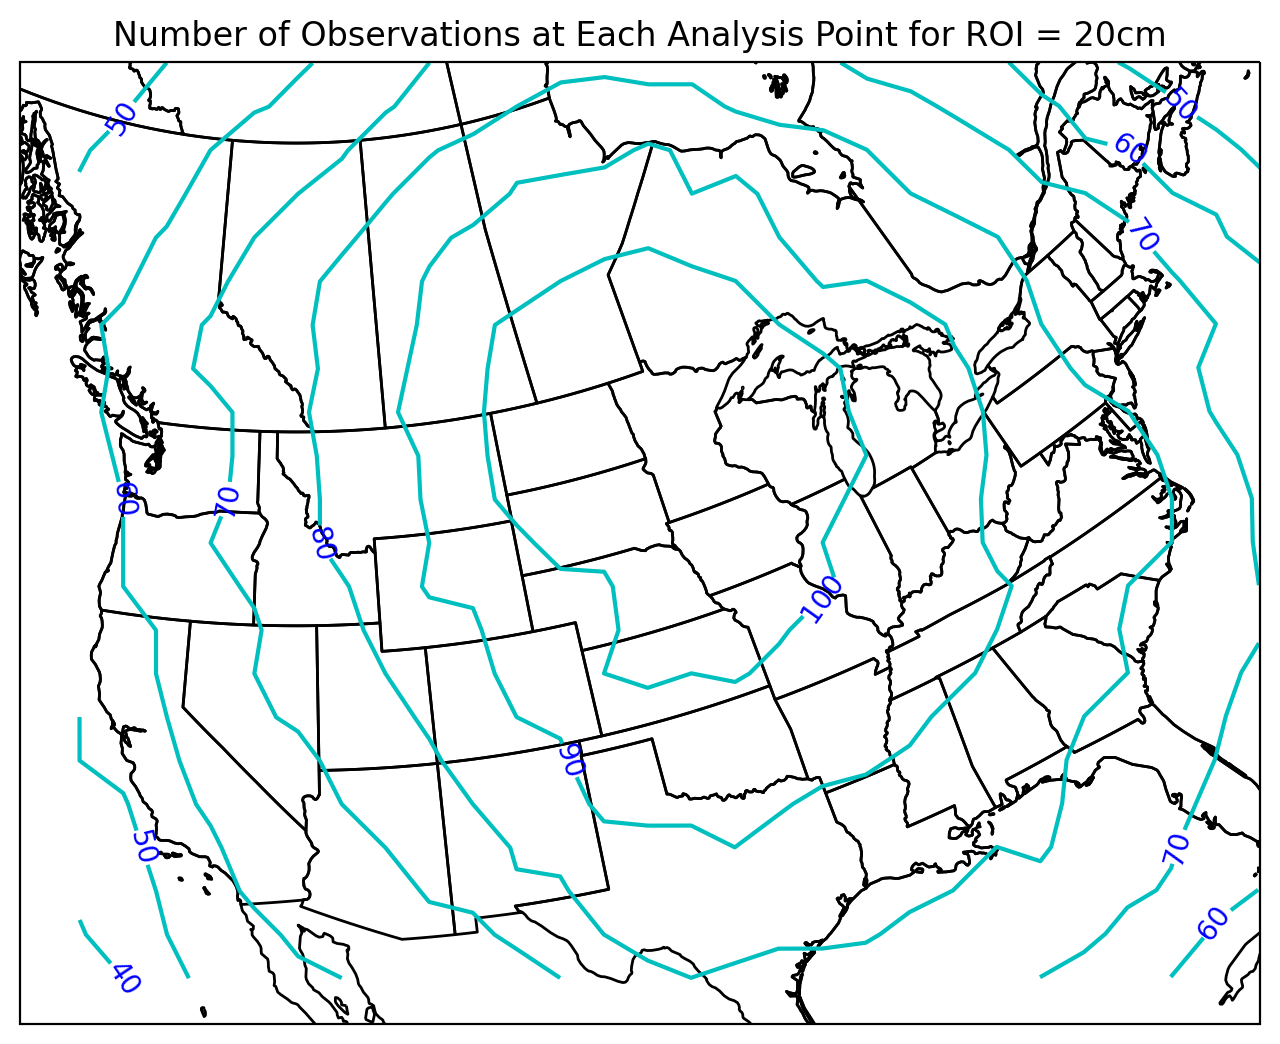

In [51]:
### Store the number of observations available for each grid point in text files ###
### Plot 500mb analyses over a map ###
#convert analysis x,y to lat/lon#
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)
#bue dots are the grid points we created
#orange dot is where there is an upper air observation
#ax1.scatter(proj_lon.ravel(), proj_lat.ravel(),transform = ccrs.PlateCarree())
#ax1.scatter(obs_lon, obs_lat, transform = ccrs.PlateCarree())
  
#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(proj_lon,proj_lat,obs_matrix[:,:,1],colors='c',transform=ccrs.PlateCarree())
plt.clabel(cs1, colors = 'b')
plt.title("Number of Observations at Each Analysis Point for ROI = 20cm")
plt.savefig('C://Users/research/thesis_code/ATSC_528_09192022/ATSC528_2022-main/01-Function_Fitting/number_obs_at_analysis_ROI20.png')
plt.show()



In [ ]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    ROI 10 cm:
    There is a large trough near the four corners of Arizona, New Mexico, Colorado, and Utah. There is a ridge over the Wisconsin and Illinois. There is a werid honeycomb looking contour off the coast of Florida. 
    The freezing air is mainly over Canada with a small portion within Montana. The contours are packed together, indicating that the gradient is stronger and faster winds are present. 
    ROI 20 cm:
    The weird honeycomb feature off the coast of Florida is gone. The contours are spread out indicating the gradient is weaker and the winds are slower. The trough is not as defined and located farther west and 
    the ridge located in the midwest is less defined. The features overall are less defined and everything migrated northward. The plot is overall smoothed out. 
    

2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?
    The ROI of 20 cm is taking a larger amount area and therefore there are more points going into the analysis meaning that the smaller scale features or local features are washed out by the average 
    features present. The small disturbances are flushed out. The ROI of 10 cm picks up the smaller scale or local variations so you see more "noise." The ROI 10 cm includes less points so the smaller scale
    features make a bigger difference .
    Main Point: The larger the ROI the more points you have included meaning that the smaller scale features are "washed" out and you get an output that is more representative of the general pattern. The smaller 
    the ROI the more small scale features are picked up.

3 - Run your program using a radius of influence of 6 cm (do not need to show).  
    Describe the results - do they look realistic?  If there are problems, what
    do you think might be causing them?
    When the ROI is 6cm the plot does NOT look realistic. The contours off the coastlines and over Canada are wild looking. I think the problem here is that you have a lot less points so the small features 
    largely impacting the whole. You are not pulling the overall pattern but the local features for the region the observation site is at. 
    

4 - Suppose you ran this program with a small enough radius of influence that only one
    observation was available for determining a polynomial fit at a grid point.  Should
    you be able to perform the matrix inversion?  Why or why not?
    
    No you can not because you end up with a determinant of zero so it is a signular matrix. Singular Matrices can NOT be inverted. (Example in cell below)
    

'''

In [11]:
##Showing Number #4:
Ro_vals = np.array([1])

y_cols = 22
x_cols = 28
#Make two empty arrays one for the observations and one for the Analysis 
obs_matrix = np.empty((x_cols, y_cols, len(Ro_vals)))
analysis_matrix = np.empty((x_cols, y_cols, len(Ro_vals)))

#Loop through the length of the radius of influence 
for i in range(len(Ro_vals)):
    roi = Ro_vals[i]
    for j in range(len(grid_x)):
        for k in range(len(grid_x[0])):
            x_rel = grid_x[j,k] - x_obs   #This is the distance in the x 
            y_rel = grid_y[j,k] - y_obs   #This is the distance in the y. 
            #This will the distance formula so we are getting the radius here remember the bubble with the points.
            radius = ((x_rel**2 + y_rel**2)**(1/2)) 
            index_ROI = np.where(radius <= roi)[0]
           
            #Make the observation matrix the same size as the index matrix 
            obs_matrix[j,k,i] = len(index_ROI) #start filling the matrix
            
            #using the equation fo(x_k, y_k) we need to make the matrices for each one of those variables
            x_k = x_rel[index_ROI]   #x_k  values are only within the ROI for each point
            y_k = y_rel[index_ROI]  #y_k  values are only within the ROI for each point
            Fo = height[index_ROI] #Fo  height values are only within the ROI for each point
            Fo = np.array(Fo)
            
            #More empty arrays
            R = np.zeros((6,6))
            O = np.zeros(6)
            #print(index_ROI)
            for q in range(len(y_k)):
                r2 = np.matrix([1,x_k[q],y_k[q],x_k[q]**2,y_k[q]**2,x_k[q]*y_k[q]])
                r1 = r2.T
                r = r1*r2
                R += np.array(r)
                O += np.array([Fo[q],x_k[q]*Fo[q], y_k[q]*Fo[q],x_k[q]**2*Fo[q],y_k[q]**2*Fo[q], x_k[q]*y_k[q]*Fo[q]])
            
            R = R/obs_matrix[j,k,i]
            #print(R)
            O = O/obs_matrix[j,k,i]
            # Calulate the C
            C = np.linalg.inv(np.matrix(R))*np.matrix(O).T
            #print(C[0,0])
            analysis_matrix[j,k,i] = C[0,0]  #Set equal to C_00 due to that being only value we care about


C:\Users\research\AppData\Local\Temp\ipykernel_30364\436200256.py:42: RuntimeWarning: invalid value encountered in divide
  R = R/obs_matrix[j,k,i]
C:\Users\research\AppData\Local\Temp\ipykernel_30364\436200256.py:44: RuntimeWarning: invalid value encountered in divide
  O = O/obs_matrix[j,k,i]
